# Machine Learning Idea

In [33]:
import phate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from  Data_Selection import *
from  Data_Selection_for_BD import *

file1 = '/Users/amittaris/Documents/GitHub/Dimensionality-Reduction-for-Cellular-Differentiation-/DR notebooks/PHATE/datasets/df_facs_decision1.csv'
df_facs_decision1 = pd.read_csv(file1)

In [34]:

selected_data, combined_equal_data  = data_selector_for_bd(7200, df_facs_decision1)

In [35]:
number_of_runs = 10
collection_of_phates = []
for i in range(number_of_runs):
    phate_op = phate.PHATE()
    data_phate = phate_op.fit_transform(selected_data)
    collection_of_phates.append(data_phate)

Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.41 seconds.
    Calculating affinities...
    Calculated affinities in 0.14 seconds.
  Calculated graph and diffusion operator in 3.57 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.73 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.50 seconds.
  Calculated landmark operator in 9.13 seconds.
  Calculating optimal t...
    Automatically selected t = 32
  Calculated optimal t in 4.11 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.68 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.44 seconds.
Calculated PHATE in 20.94 seconds.
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN sea

Procrustes analysis is used to align multiple PHATE embeddings that differ due to random rotations, reflections, or scaling. By selecting one embedding as a reference, each subsequent embedding is transformed—translated, scaled, and optimally rotated—so that its point positions best match the reference. This removes visual randomness while preserving the underlying geometry. After alignment, the embeddings can be meaningfully compared or averaged, allowing you to identify stable structural features in the data across multiple PHATE runs.

In [ ]:
from scipy.spatial import procrustes
import numpy as np

reference = collection_of_phates[0]                # Choose the first PHATE embedding as your reference
aligned_embeddings = [reference]         # Initialize list with the reference

for emb in collection_of_phates[1:]:               # For each other PHATE run...
    _, aligned, _ = procrustes(reference, emb)
    aligned_embeddings.append(aligned)   # Store the aligned version


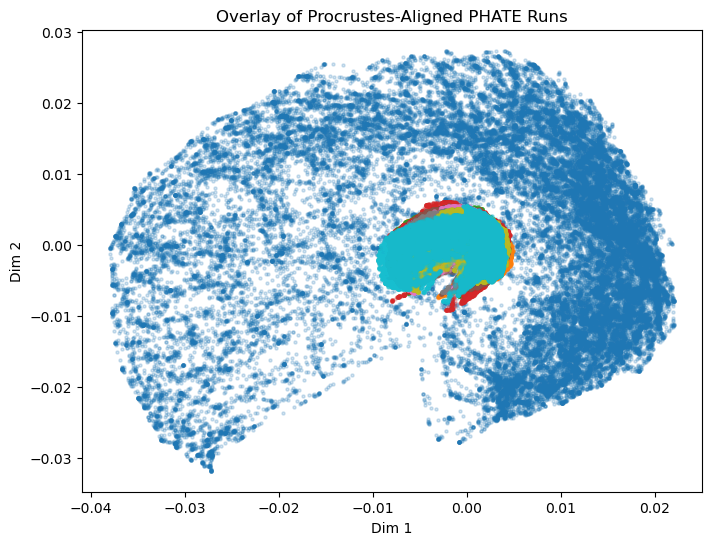

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for emb in aligned_embeddings:
    plt.scatter(emb[:, 0], emb[:, 1], s=5, alpha=0.2)

plt.title("Overlay of Procrustes-Aligned PHATE Runs")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


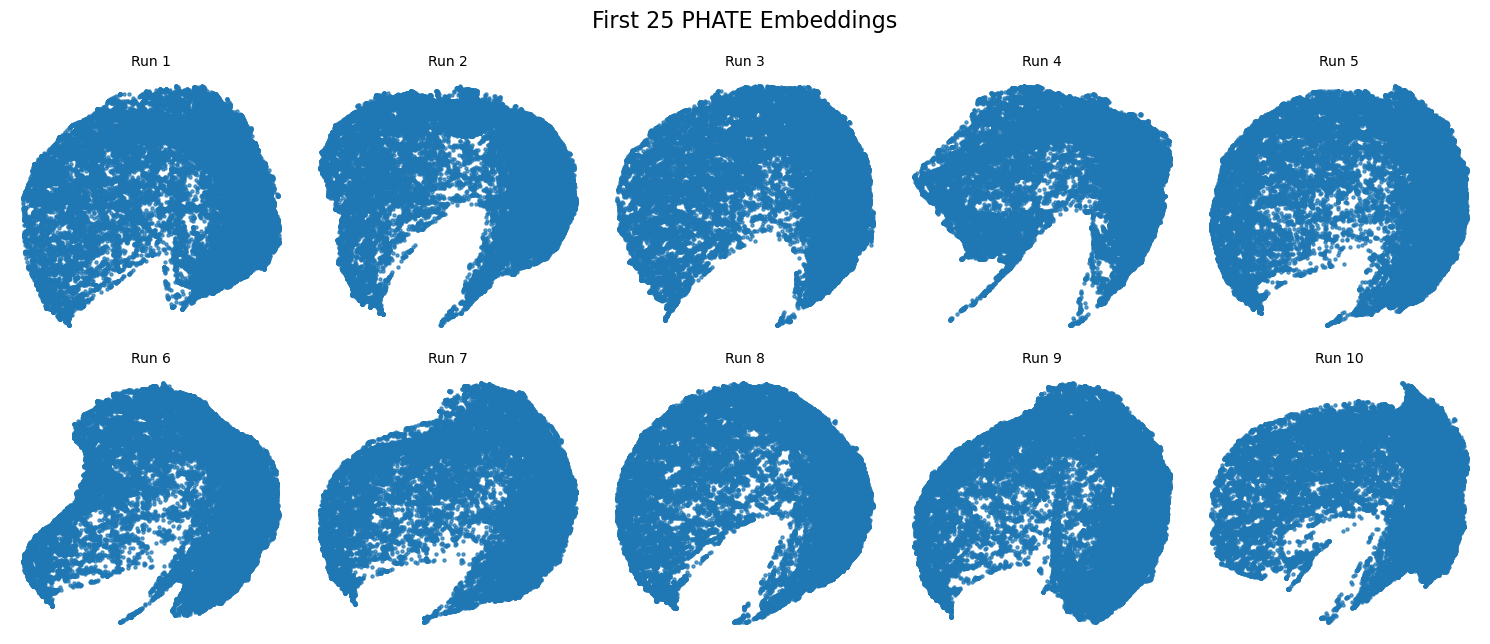

In [ ]:
# Plot the first 25 embeddings
plt.figure(figsize=(15, 15))  # Adjust figure size

for i in range(10):
    ax = plt.subplot(5, 5, i + 1)  # 5x5 grid
    emb = collection_of_phates[i]
    ax.scatter(emb[:, 0], emb[:, 1], s=5, alpha=0.7)
    ax.set_title(f'Run {i+1}', fontsize=10)
    ax.axis('off')  # Hide axis ticks

plt.tight_layout()
plt.suptitle("First 25 PHATE Embeddings", fontsize=16, y=1.02)
plt.show()

# Fine tuning of parameters 

In [39]:
def plot_phate(embedding, title):
    plt.figure(figsize=(4, 4))
    plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


Running PHATE with knn=5, decay=10
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.71 seconds.
    Calculating affinities...
    Calculated affinities in 0.68 seconds.
  Calculated graph and diffusion operator in 4.47 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.35 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.02 seconds.
  Calculated landmark operator in 10.21 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 4.35 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.98 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.59 seconds.
Calculated PHATE in 22.62 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


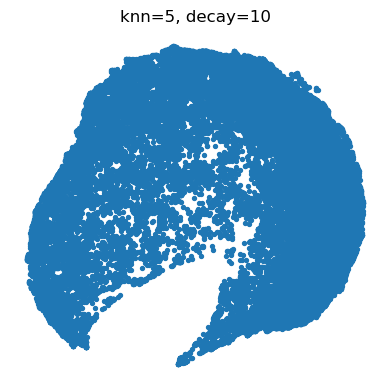

Running PHATE with knn=5, decay=40
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.48 seconds.
    Calculating affinities...
    Calculated affinities in 0.13 seconds.
  Calculated graph and diffusion operator in 3.64 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.22 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.66 seconds.
  Calculated landmark operator in 9.67 seconds.
  Calculating optimal t...
    Automatically selected t = 32
  Calculated optimal t in 4.01 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.75 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.50 seconds.
Calculated PHATE in 20.58 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


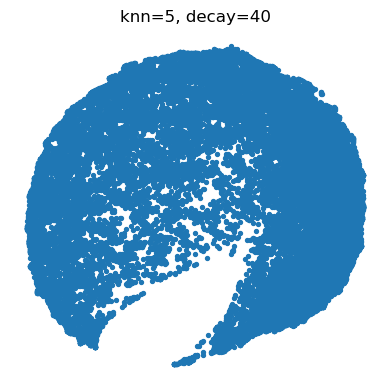

Running PHATE with knn=5, decay=100
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.39 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 3.52 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.84 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.44 seconds.
  Calculated landmark operator in 7.04 seconds.
  Calculating optimal t...
    Automatically selected t = 32
  Calculated optimal t in 5.45 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.73 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.90 seconds.
Calculated PHATE in 19.68 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


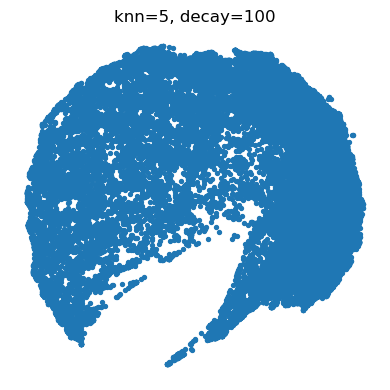

Running PHATE with knn=10, decay=10
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 4.58 seconds.
    Calculating affinities...
    Calculated affinities in 0.58 seconds.
  Calculated graph and diffusion operator in 5.24 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 6.87 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.96 seconds.
  Calculated landmark operator in 13.77 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 6.82 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.98 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.65 seconds.
Calculated PHATE in 29.46 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


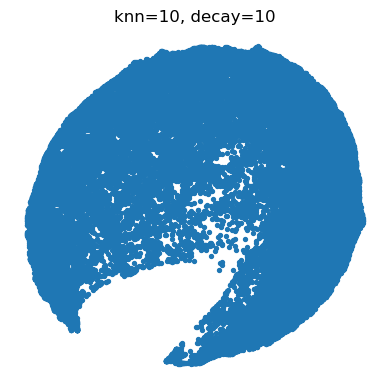

Running PHATE with knn=10, decay=40
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 4.49 seconds.
    Calculating affinities...
    Calculated affinities in 0.22 seconds.
  Calculated graph and diffusion operator in 4.74 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.56 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.52 seconds.
  Calculated landmark operator in 10.91 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 15.18 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.73 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.85 seconds.
Calculated PHATE in 35.67 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


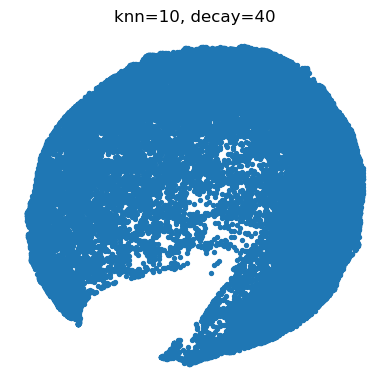

Running PHATE with knn=10, decay=100
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 5.57 seconds.
    Calculating affinities...
    Calculated affinities in 0.39 seconds.
  Calculated graph and diffusion operator in 6.30 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 10.89 seconds.
    Calculating KMeans...
    Calculated KMeans in 8.72 seconds.
  Calculated landmark operator in 20.53 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 7.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.79 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.80 seconds.
Calculated PHATE in 37.72 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


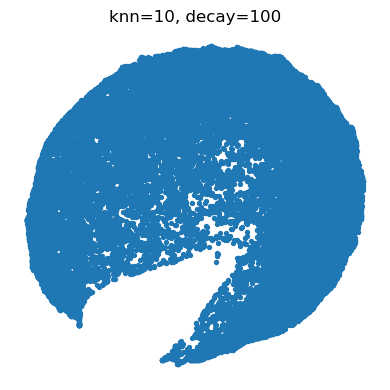

Running PHATE with knn=20, decay=10
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 6.47 seconds.
    Calculating affinities...
    Calculated affinities in 1.39 seconds.
  Calculated graph and diffusion operator in 8.08 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 9.03 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.55 seconds.
  Calculated landmark operator in 14.51 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 6.52 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.03 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.71 seconds.
Calculated PHATE in 32.87 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


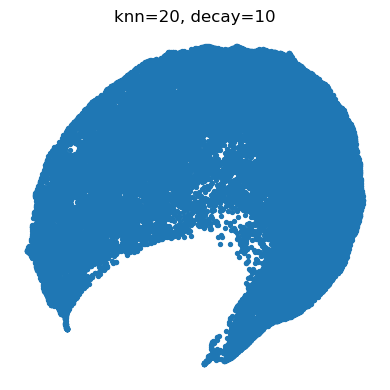

Running PHATE with knn=20, decay=40
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 6.26 seconds.
    Calculating affinities...
    Calculated affinities in 0.32 seconds.
  Calculated graph and diffusion operator in 6.63 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 5.87 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.08 seconds.
  Calculated landmark operator in 11.87 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 6.20 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.23 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.61 seconds.
Calculated PHATE in 28.56 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


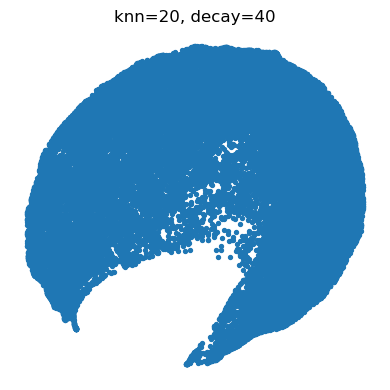

Running PHATE with knn=20, decay=100
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 6.68 seconds.
    Calculating affinities...
    Calculated affinities in 0.35 seconds.
  Calculated graph and diffusion operator in 7.09 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 8.87 seconds.
    Calculating KMeans...
    Calculated KMeans in 12.16 seconds.
  Calculated landmark operator in 22.16 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 16.70 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 3.49 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.01 seconds.
Calculated PHATE in 52.49 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


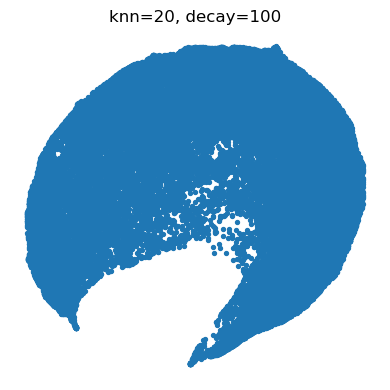

In [41]:
knn_values = [5, 10, 20]
decay_values = [10, 40, 100]

for knn in knn_values:
    for decay in decay_values:
        print(f"Running PHATE with knn={knn}, decay={decay}")
        phate_op = phate.PHATE(knn=knn, decay=decay, random_state=42)
        embedding = phate_op.fit_transform(selected_data)
        plot_phate(embedding, title=f"knn={knn}, decay={decay}")


Running PHATE with knn=5, t=5
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.57 seconds.
    Calculating affinities...
    Calculated affinities in 0.19 seconds.
  Calculated graph and diffusion operator in 3.80 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.87 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.21 seconds.
  Calculated landmark operator in 11.29 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.50 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.94 seconds.
Calculated PHATE in 18.56 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


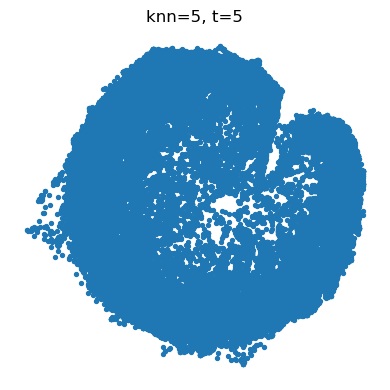

Running PHATE with knn=5, t=30
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.44 seconds.
    Calculating affinities...
    Calculated affinities in 0.15 seconds.
  Calculated graph and diffusion operator in 3.62 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.92 seconds.
    Calculating KMeans...
    Calculated KMeans in 17.89 seconds.
  Calculated landmark operator in 24.21 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.43 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.61 seconds.
Calculated PHATE in 31.90 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


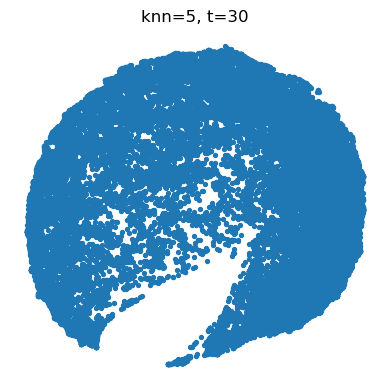

Running PHATE with knn=5, t=60
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.41 seconds.
    Calculating affinities...
    Calculated affinities in 0.17 seconds.
  Calculated graph and diffusion operator in 3.60 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.16 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.87 seconds.
  Calculated landmark operator in 10.15 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.24 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.54 seconds.
Calculated PHATE in 23.61 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


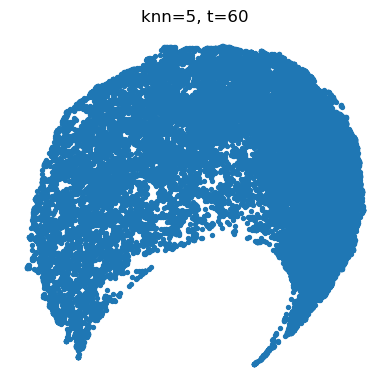

Running PHATE with knn=10, t=5
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 4.99 seconds.
    Calculating affinities...
    Calculated affinities in 0.40 seconds.
  Calculated graph and diffusion operator in 5.53 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 7.05 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.33 seconds.
  Calculated landmark operator in 12.38 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.39 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.85 seconds.
Calculated PHATE in 21.18 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


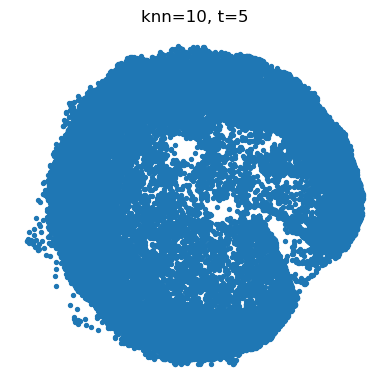

Running PHATE with knn=10, t=30
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 5.66 seconds.
    Calculating affinities...
    Calculated affinities in 0.22 seconds.
  Calculated graph and diffusion operator in 5.94 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 9.57 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.40 seconds.
  Calculated landmark operator in 15.93 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.89 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.62 seconds.
Calculated PHATE in 25.39 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


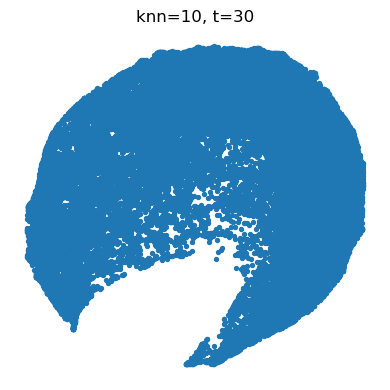

Running PHATE with knn=10, t=60
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 4.38 seconds.
    Calculating affinities...
    Calculated affinities in 0.18 seconds.
  Calculated graph and diffusion operator in 4.61 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.29 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.80 seconds.
  Calculated landmark operator in 12.26 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 6.61 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.46 seconds.
Calculated PHATE in 27.02 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


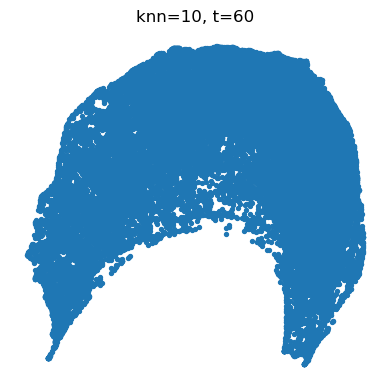

Running PHATE with knn=20, t=5
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 5.97 seconds.
    Calculating affinities...
    Calculated affinities in 0.31 seconds.
  Calculated graph and diffusion operator in 6.35 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 5.18 seconds.
    Calculating KMeans...
    Calculated KMeans in 11.11 seconds.
  Calculated landmark operator in 17.30 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.75 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.90 seconds.
Calculated PHATE in 27.33 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


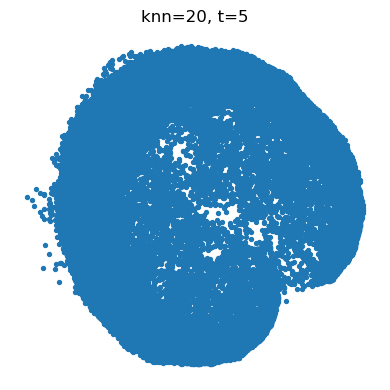

Running PHATE with knn=20, t=30
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 7.58 seconds.
    Calculating affinities...
    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 7.95 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 5.11 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.77 seconds.
  Calculated landmark operator in 10.73 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.00 seconds.
Calculated PHATE in 22.77 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


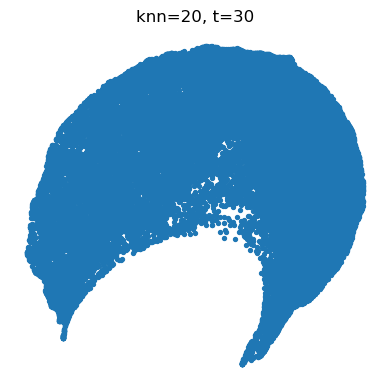

Running PHATE with knn=20, t=60
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 6.07 seconds.
    Calculating affinities...
    Calculated affinities in 0.28 seconds.
  Calculated graph and diffusion operator in 6.40 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.96 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.79 seconds.
  Calculated landmark operator in 10.68 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.12 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.85 seconds.
Calculated PHATE in 21.06 seconds.


/var/folders/n_/71k4tw3x1m3b_1yxyb68trv00000gn/T/ipykernel_61301/1651589498.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=8, cmap='Spectral')


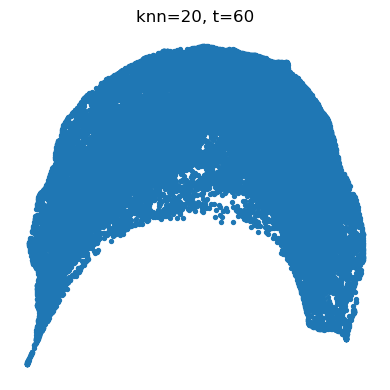

In [42]:
knn_values = [5, 10, 20]
t_values = [5, 30, 60]

for knn in knn_values:
    for t in t_values:
        print(f"Running PHATE with knn={knn}, t={t}")
        phate_op = phate.PHATE(knn=knn, t=t, random_state=42)
        embedding = phate_op.fit_transform(selected_data)
        plot_phate(embedding, title=f"knn={knn}, t={t}")


In [43]:
decay_values = [10, 40, 100]
t_values = [5, 30, 60]

for decay in decay_values:
    for t in t_values:
        print(f"Running PHATE with decay={decay}, t={t}")
        phate_op = phate.PHATE(decay=decay, t=t, random_state=42)
        embedding = phate_op.fit_transform(selected_data)
        plot_phate(embedding, title=f"decay={decay}, t={t}")


Running PHATE with decay=10, t=5
Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.87 seconds.
    Calculating affinities...
    Calculated affinities in 0.65 seconds.
  Calculated graph and diffusion operator in 4.58 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 5.82 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.09 seconds.
  Calculated landmark operator in 11.93 seconds.
Calculated PHATE in 16.51 seconds.


KeyboardInterrupt: 